In [15]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 7C9B-5B45

 Directory of C:\Users\POOJITHA

15-11-2022  15:25    <DIR>          .
26-12-2021  00:33    <DIR>          ..
14-11-2022  14:03    <DIR>          .anaconda
04-02-2022  21:20    <DIR>          .android
02-11-2022  15:44    <DIR>          .astropy
15-11-2022  10:57    <DIR>          .conda
14-11-2022  14:01                25 .condarc
14-11-2022  14:00    <DIR>          .continuum
11-03-2021  22:30                16 .emulator_console_auth_token
11-03-2021  20:54    <DIR>          .gradle
25-03-2021  23:47    <DIR>          .idlerc
15-11-2022  14:30    <DIR>          .ipynb_checkpoints
14-11-2022  13:58    <DIR>          .ipython
15-11-2022  09:50    <DIR>          .jupyter
15-11-2022  10:55    <DIR>          .keras
19-03-2021  00:38    <DIR>          .m2
24-12-2020  19:21    <DIR>          .vscode
23-12-2020  20:04    <DIR>          3D Objects
14-11-2022  14:12    <DIR>          anaconda3
11-03-2021  18:18    <DIR>         

In [16]:
pwd

'C:\\Users\\POOJITHA'

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [18]:
x_train=train_datagen.flow_from_directory(r"C:\Users\POOJITHA\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [19]:
x_test=test_datagen.flow_from_directory(r"C:\Users\POOJITHA\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten


In [21]:
model=Sequential()

In [22]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [24]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [25]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [26]:
1238/24

51.583333333333336

In [27]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 129s 566ms/step - loss: 0.8687 - accuracy: 0.7836 - val_loss: 0.2515 - val_accuracy: 0.9110
Epoch 2/10
225/225 [==============================] - 142s 630ms/step - loss: 0.2383 - accuracy: 0.9207 - val_loss: 0.1662 - val_accuracy: 0.9425
Epoch 3/10
225/225 [==============================] - 127s 562ms/step - loss: 0.1688 - accuracy: 0.9393 - val_loss: 0.0907 - val_accuracy: 0.9674
Epoch 4/10
225/225 [==============================] - 125s 554ms/step - loss: 0.1458 - accuracy: 0.9463 - val_loss: 0.1846 - val_accuracy: 0.9336
Epoch 5/10
225/225 [==============================] - 131s 583ms/step - loss: 0.1402 - accuracy: 0.9547 - val_loss: 0.0756 - val_accuracy: 0.9715
Epoch 6/10
225/225 [==============================] - 134s 596ms/step - loss: 0.0995 - accuracy: 0.9669 - val_loss: 0.2260 - val_accuracy: 0.9353
Epoch 7/10
225/225 [==============================] - 122s 543ms/step - loss: 0.1004 - accuracy: 0.9651 - val_loss: 0.0820 -

In [29]:
model.save('fruitdata.h5')

In [30]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('fruitdata.h5')

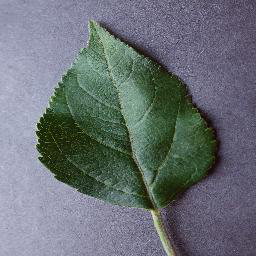

In [33]:
img=image.load_img(r"C:\Users\POOJITHA\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Apple___healthy\0afaaf78-6ec5-49ee-a070-f6217039ed2d___RS_HL 7827.JPG")
img

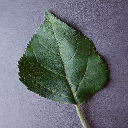

In [34]:
img=image.load_img(r"C:\Users\POOJITHA\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Apple___healthy\0afaaf78-6ec5-49ee-a070-f6217039ed2d___RS_HL 7827.JPG",target_size=(128,128))
img

In [35]:
x=image.img_to_array(img)
x

array([[[151., 153., 176.],
        [151., 153., 176.],
        [149., 151., 174.],
        ...,
        [ 80.,  72.,  93.],
        [ 75.,  67.,  88.],
        [ 88.,  80., 101.]],

       [[155., 157., 180.],
        [151., 153., 176.],
        [151., 153., 176.],
        ...,
        [ 76.,  68.,  89.],
        [ 93.,  85., 106.],
        [ 67.,  59.,  80.]],

       [[145., 147., 170.],
        [143., 145., 168.],
        [141., 143., 166.],
        ...,
        [107.,  99., 120.],
        [ 73.,  65.,  86.],
        [ 87.,  79., 100.]],

       ...,

       [[170., 171., 192.],
        [168., 169., 190.],
        [163., 164., 185.],
        ...,
        [ 78.,  71.,  89.],
        [ 83.,  76.,  94.],
        [ 86.,  79.,  97.]],

       [[169., 170., 191.],
        [170., 171., 192.],
        [162., 163., 184.],
        ...,
        [ 70.,  63.,  81.],
        [ 77.,  70.,  88.],
        [ 77.,  70.,  88.]],

       [[163., 164., 185.],
        [164., 165., 186.],
        [169., 1

In [36]:
x=np.expand_dims(x,axis=0)
x

array([[[[151., 153., 176.],
         [151., 153., 176.],
         [149., 151., 174.],
         ...,
         [ 80.,  72.,  93.],
         [ 75.,  67.,  88.],
         [ 88.,  80., 101.]],

        [[155., 157., 180.],
         [151., 153., 176.],
         [151., 153., 176.],
         ...,
         [ 76.,  68.,  89.],
         [ 93.,  85., 106.],
         [ 67.,  59.,  80.]],

        [[145., 147., 170.],
         [143., 145., 168.],
         [141., 143., 166.],
         ...,
         [107.,  99., 120.],
         [ 73.,  65.,  86.],
         [ 87.,  79., 100.]],

        ...,

        [[170., 171., 192.],
         [168., 169., 190.],
         [163., 164., 185.],
         ...,
         [ 78.,  71.,  89.],
         [ 83.,  76.,  94.],
         [ 86.,  79.,  97.]],

        [[169., 170., 191.],
         [170., 171., 192.],
         [162., 163., 184.],
         ...,
         [ 70.,  63.,  81.],
         [ 77.,  70.,  88.],
         [ 77.,  70.,  88.]],

        [[163., 164., 185.],
       

In [37]:
x

array([[[[151., 153., 176.],
         [151., 153., 176.],
         [149., 151., 174.],
         ...,
         [ 80.,  72.,  93.],
         [ 75.,  67.,  88.],
         [ 88.,  80., 101.]],

        [[155., 157., 180.],
         [151., 153., 176.],
         [151., 153., 176.],
         ...,
         [ 76.,  68.,  89.],
         [ 93.,  85., 106.],
         [ 67.,  59.,  80.]],

        [[145., 147., 170.],
         [143., 145., 168.],
         [141., 143., 166.],
         ...,
         [107.,  99., 120.],
         [ 73.,  65.,  86.],
         [ 87.,  79., 100.]],

        ...,

        [[170., 171., 192.],
         [168., 169., 190.],
         [163., 164., 185.],
         ...,
         [ 78.,  71.,  89.],
         [ 83.,  76.,  94.],
         [ 86.,  79.,  97.]],

        [[169., 170., 191.],
         [170., 171., 192.],
         [162., 163., 184.],
         ...,
         [ 70.,  63.,  81.],
         [ 77.,  70.,  88.],
         [ 77.,  70.,  88.]],

        [[163., 164., 185.],
       

In [38]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 3s 3s/step


In [39]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [40]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]


'Apple___healthy'

In [41]:
img=image.load_img(r"C:\Users\POOJITHA\Downloads\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test\Apple___healthy\0afaaf78-6ec5-49ee-a070-f6217039ed2d___RS_HL 7827.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]


1/1 [==============================] - 0s 94ms/step


'Apple___healthy'